Створимо набір даних з нашого csv файлу

In [201]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

def getDataset():
    data = pd.read_csv('Export1.csv',sep=';',encoding='cp1252')
    return data

dataset = getDataset()

Перевіримо їх на нормальність

In [202]:
dataset = dataset.drop(dataset.columns[[0, 1, 2, 3, 4, 6]], axis=1)

import scipy.stats as stats
def kolm_smirn_check(dFrame, column):
    ks_statistic, p_value = stats.kstest(dFrame[column], 'norm')
    if p_value > 0.05: return True
    return False

def pearson_check(dFrame, column):
    statistic, p_value = stats.normaltest(dFrame[column])
    if p_value > 0.05: return True
    return False

print("#1 test - Kolmagorov-Smirnov test,\n#2 test - Pearson test\n")
for c in dataset.columns:
    print('{0:<15}'.format(c + ":"),f"#1 test - {kolm_smirn_check(dataset, c)}, #2 test - {pearson_check(dataset, c)};")


#1 test - Kolmagorov-Smirnov test,
#2 test - Pearson test

ratio:          #1 test - False, #2 test - False;
gdp:            #1 test - False, #2 test - False;
population:     #1 test - False, #2 test - False;
sales_of_cigarettes_per_adult_per_day: #1 test - False, #2 test - False;
annual_co2_emissions_tonnes: #1 test - False, #2 test - False;


Перевіримо коефіцієнти корреляції

In [203]:
dataset.corr()

,ratio,gdp,population,sales_of_cigarettes_per_adult_per_day,annual_co2_emissions_tonnes
ratio,1.000000,0.774552,0.137843,-0.047489,0.090640
gdp,0.774552,1.000000,0.243990,-0.167556,0.247694
population,0.137843,0.243990,1.000000,0.045570,0.955826
sales_of_cigarettes_per_adult_per_day,-0.047489,-0.167556,0.045570,1.000000,0.003515
annual_co2_emissions_tonnes,0.090640,0.247694,0.955826,0.003515,1.000000


Розіб'ємо дані на тренувальні та тестові параметри та залежну змінну

In [204]:
from sklearn.model_selection import train_test_split

data = dataset.iloc[:,1:5]
fact = dataset['ratio']
X_train, X_test, Y_train, Y_test = train_test_split(data, fact,test_size = 0.25,random_state = 0)

Лінійна регресія.
Підготуємо всі можливі набори параметрів для моделювання та власне застосуємо лінійну регресію до кожного з них

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X_variant_tuples = ["gdp", "population", "sales_of_cigarettes_per_adult_per_day", "annual_co2_emissions_tonnes",
    
                    ["gdp", "population", "sales_of_cigarettes_per_adult_per_day", "annual_co2_emissions_tonnes"],
                    ["gdp", "population"], ["gdp", "sales_of_cigarettes_per_adult_per_day"], ["gdp", "annual_co2_emissions_tonnes"],
                    ["population", "sales_of_cigarettes_per_adult_per_day"], ["population", "annual_co2_emissions_tonnes"],
                    ["sales_of_cigarettes_per_adult_per_day", "annual_co2_emissions_tonnes"],

                    ["gdp", "population", "sales_of_cigarettes_per_adult_per_day"], 
                    ["gdp", "population","annual_co2_emissions_tonnes"], 
                    ["gdp", "sales_of_cigarettes_per_adult_per_day", "annual_co2_emissions_tonnes"], 
                    ["population", "sales_of_cigarettes_per_adult_per_day", "annual_co2_emissions_tonnes"]]

linear_regression_models_list = []

for i in range(len(X_variant_tuples)):
    if i < 4: 
        linear_regression_models_list.append(LinearRegression().fit(X_train[X_variant_tuples[i]].to_numpy().reshape(-1,1), Y_train))
    else:
        linear_regression_models_list.append(LinearRegression().fit(X_train[X_variant_tuples[i]], Y_train))
        

Тепер для кожної нашої моделі спроєктуємо передбачення та будемо зберігати його в массиві даних

In [206]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE = []
R2 = []

prediction = []

def predict_by(prediction, s):
    for i in range(len(X_variant_tuples)):
        if i < 4:
            prediction.append(s[i].predict(X_test[X_variant_tuples[i]].to_numpy().reshape(-1,1)))
        else:
            prediction.append(s[i].predict(X_test[X_variant_tuples[i]]))

    return prediction

prediction = predict_by(prediction, linear_regression_models_list)
print(prediction)

[array([0.30055253, 0.23730662, 0.25745379, 0.29168762, 0.22957692,
       0.2273141 , 0.28136563, 0.25161962, 0.19999547, 0.27672129,
       0.25436213, 0.20261434, 0.29698329, 0.25368594, 0.27720082,
       0.27064812, 0.17281835, 0.29464594, 0.20447066, 0.1987499 ,
       0.24845074, 0.29693667, 0.2385931 , 0.27593723, 0.27988533,
       0.24606003, 0.26696026, 0.29189377, 0.25759105, 0.28633219,
       0.23833473, 0.29707851, 0.18865241, 0.198939  , 0.25531339,
       0.19667341, 0.24320802, 0.2542745 , 0.25411423, 0.21622176,
       0.17010838, 0.29991786, 0.26356712, 0.25688644, 0.29162274,
       0.23655898, 0.26615908, 0.22431726, 0.26322603, 0.23545356,
       0.33166011, 0.28692438, 0.16469494, 0.32972123, 0.26730507,
       0.21052278, 0.16942938, 0.31572451, 0.28569374, 0.23780758,
       0.26894609, 0.26881451, 0.27664023, 0.22802073, 0.27226238,
       0.22874924, 0.23779891, 0.30209134, 0.22006535, 0.17234289,
       0.26618578, 0.25531743, 0.25518279, 0.20224889, 0.1704

Для кожного з передбачень обрахуємо MSE та R2.
Для MSE побудужмо графік для наочності та аби зрозуміти, яка сама модель є ефективнішою

[0.0015067597287360514, 0.003852151494575099, 0.004026399727361655, 0.003874289757312367, 0.0013026028278516732, 0.0014833530593858168, 0.0014526232611095815, 0.0014306078219743733, 0.004008792266713763, 0.003795901989735636, 0.004022878500132977, 0.0014218584023596168, 0.0013379169285308683, 0.001371339445990647, 0.003954269999128051]


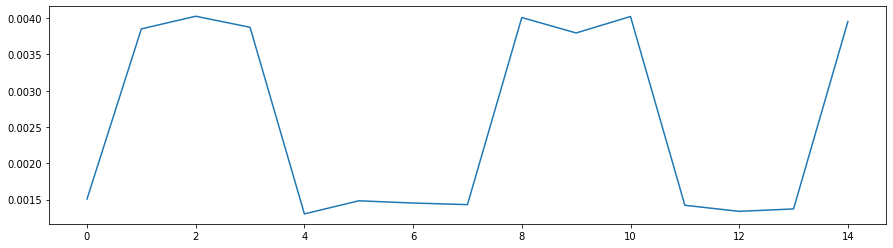

In [207]:
for i in range(len(prediction)):
    MSE.append(mean_squared_error(Y_test,prediction[i]))
    R2.append(r2_score(Y_test,prediction[i]))

import matplotlib.pyplot as plt
print(MSE)
#plt.plot(R2)
plt.plot(MSE)
plt.show()

Програмно порахуємо та визначимо, яка модель є найкращою

In [208]:
indexMinMSE = np.sum((np.array(prediction)- Y_test.to_numpy())**2,axis = 1).argmin()
MinMSE = np.sum((np.array(prediction) - Y_test.to_numpy())**2, axis = 1)
#print(MinMSE)
#print(indexMinMSE)
print("Best model is:")
print(f"linear model by {X_variant_tuples[indexMinMSE]} params")

Best model is:
linear model by ['gdp', 'population', 'sales_of_cigarettes_per_adult_per_day', 'annual_co2_emissions_tonnes'] params


In [209]:
from sklearn.linear_model import LogisticRegression

Тепер, знаючи, яка модель є найкращою, за допомогою кастомної функції, продемонструємо графік Learning Curve

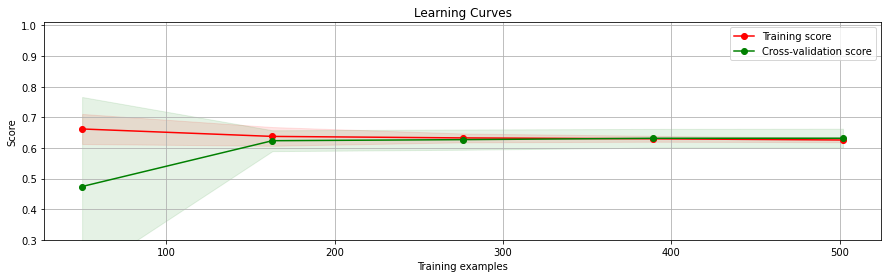

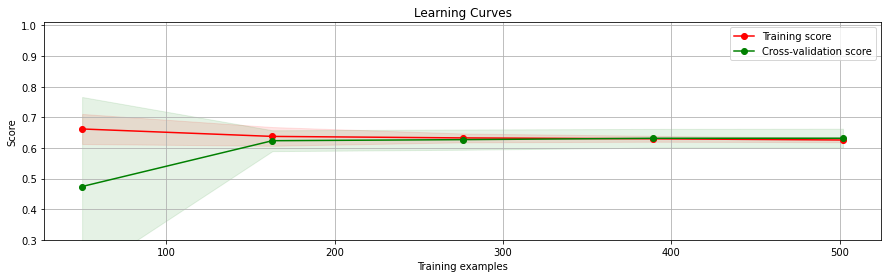

In [210]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(linear_regression_models_list[4], "Learning Curves", X_train, Y_train, (0.3, 1.01), cv=cv, n_jobs=4)
plt.show()
plot_learning_curve(linear_regression_models_list[12], "Learning Curves", X_train, Y_train, (0.3, 1.01), cv=cv, n_jobs=4)
plt.show()

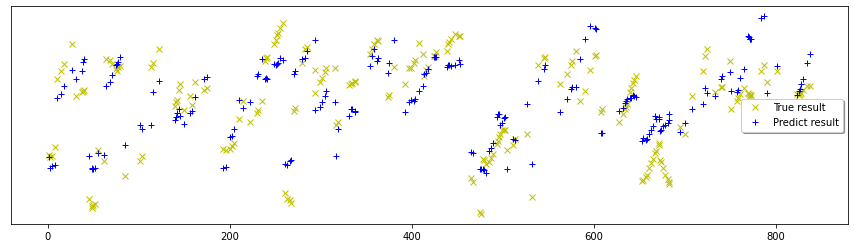

In [211]:
plt.rcParams["figure.figsize"] = (15,4)
plt.gca().axes.get_yaxis().set_visible(False)
plt.plot(X_test.index, Y_test, "yx", label = "True result")
plt.plot(X_test.index, linear_regression_models_list[4].predict(X_test), "b+", label = "Predict result")
plt.legend(loc="center right", shadow=True)
plt.show()

Random Forest Regression.
Для кожного кортежу застосуємо дану модель

In [212]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regression_model_list = []

#model = RandomForestRegressor(n_estimators=500, max_features=5).fit(X,y)

for i in range(len(X_variant_tuples)):
    if i < 4: 
        random_forest_regression_model_list.append(RandomForestRegressor(n_estimators=300, max_features=5).fit(X_train[X_variant_tuples[i]].to_numpy().reshape(-1,1), Y_train))
    else:
        random_forest_regression_model_list.append(RandomForestRegressor(n_estimators=300, max_features=5).fit(X_train[X_variant_tuples[i]], Y_train))
        

In [213]:
random_forest_prediction = []
random_forest_prediction = predict_by(random_forest_prediction, random_forest_regression_model_list)
print(random_forest_prediction)

[array([0.3271309 , 0.24103846, 0.27883875, 0.27044971, 0.22285795,
       0.25737169, 0.26618165, 0.24713751, 0.15877549, 0.2931486 ,
       0.2771864 , 0.15014884, 0.31416039, 0.28713234, 0.30971108,
       0.30813352, 0.1311189 , 0.30747626, 0.18354498, 0.15541805,
       0.26676213, 0.31416039, 0.26744926, 0.29694755, 0.28871623,
       0.2355291 , 0.26926454, 0.31335478, 0.27898576, 0.27924118,
       0.26089787, 0.32425558, 0.14910814, 0.15878475, 0.28826857,
       0.20533895, 0.26605066, 0.271893  , 0.26221716, 0.20512714,
       0.18557094, 0.31779865, 0.30224727, 0.23491801, 0.27049618,
       0.27612261, 0.28638241, 0.20011248, 0.24626999, 0.23664167,
       0.26534645, 0.26962373, 0.14444257, 0.27116238, 0.26279135,
       0.21530936, 0.15507071, 0.30772034, 0.27593804, 0.26897071,
       0.27912073, 0.28803385, 0.27387783, 0.2766529 , 0.30605978,
       0.27658696, 0.26897071, 0.26597224, 0.25087617, 0.13912588,
       0.28642183, 0.28826857, 0.29064729, 0.19741358, 0.1352

[0.001299743709539863, 0.00336278440599731, 0.004740073924817435, 0.0032458576582490998, 0.00026336444041636335, 0.000408920244118275, 0.000780804845907572, 0.0005027815644322851, 0.001614505745730443, 0.0009404613960708108, 0.0020385378889880754, 0.00028588097815882143, 0.0003194760224625314, 0.00038783816509475465, 0.0007154927911550334]


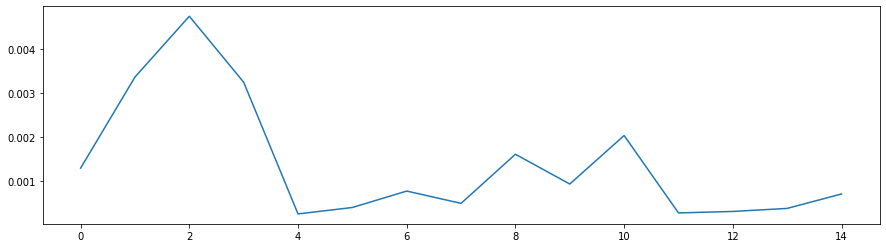

In [214]:
MSE_forest = []
R2_forest = []
for i in range(len(random_forest_prediction)):
    MSE_forest.append(mean_squared_error(Y_test,random_forest_prediction[i]))
    R2_forest.append(r2_score(Y_test,random_forest_prediction[i]))

print(MSE_forest)
#plt.plot(R2)
plt.plot(MSE_forest)
plt.show()

In [215]:
indexMinMSE_forest = np.sum((np.array(random_forest_prediction)- Y_test.to_numpy())**2,axis = 1).argmin()
MinMSE_forest = np.sum((np.array(random_forest_prediction) - Y_test.to_numpy())**2, axis = 1)
print(MinMSE)
print(indexMinMSE)
print("Best model is:")
print(f"Random Forest model by {X_variant_tuples[indexMinMSE_forest]} params")

[0.31641954 0.80895181 0.84554394 0.81360085 0.27354659 0.31150414
 0.30505088 0.30042764 0.84184638 0.79713942 0.84480449 0.29859026
 0.28096255 0.28798128 0.8303967 ]
4
Best model is:
Random Forest model by ['gdp', 'population', 'sales_of_cigarettes_per_adult_per_day', 'annual_co2_emissions_tonnes'] params


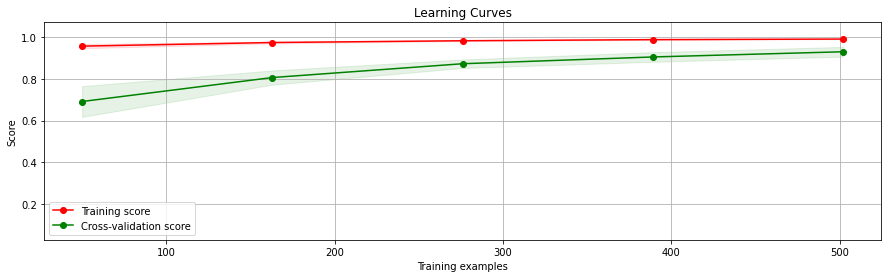

In [216]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(random_forest_regression_model_list[4], "Learning Curves", X_train, Y_train, (0.03, 1.07), cv=cv, n_jobs=4)
plt.show()

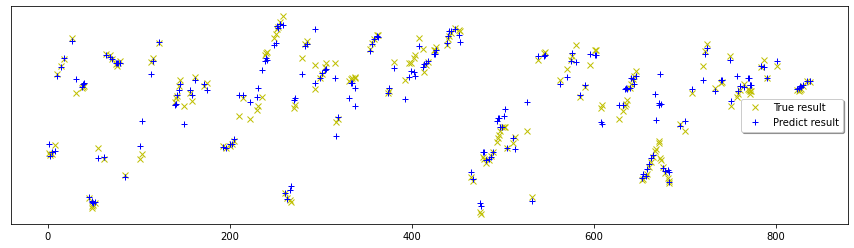

In [217]:
plt.rcParams["figure.figsize"] = (15,4)
plt.gca().axes.get_yaxis().set_visible(False)
plt.plot(X_test.index, Y_test, "yx", label = "True result")
plt.plot(X_test.index, random_forest_regression_model_list[4].predict(X_test), "b+", label = "Predict result")
plt.legend(loc="center right", shadow=True)
plt.show()